# Metabolic Scaling Theory: Mathematical Framework

**Part II: Metabolic Scaling Theory and Biological Fractals**

---

## Overview

This notebook develops the mathematical framework of **Metabolic Scaling Theory (MST)** as formulated by West, Brown, and Enquist (WBE). We derive the key equations that predict branching ratios, volume scaling, and fractal dimensions for biological networks.

## Learning Objectives

By the end of this notebook, you will be able to:

1. Derive the WBE branching ratio equations
2. Calculate volume and mass scaling in hierarchical networks
3. Understand the connection between branching geometry and metabolic rate
4. Predict fractal dimensions from first principles
5. Connect allometric power laws to network geometry

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
%matplotlib inline

# Set style
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

## 1. Allometric Power Laws

### General Form

Allometric relationships are typically expressed as power laws:

$$f(\varepsilon) = C \varepsilon^{\alpha}$$

where:
- $C$ is the prefactor (normalization coefficient)
- $\varepsilon$ is a measure of size (radius, length, mass, etc.)
- $\alpha$ is the **scaling exponent**

### Kleiber's Law

The most famous biological allometry relates metabolic rate $B$ to body mass $M$:

$$B = B_0 M^{3/4}$$

where $B_0$ is a normalization constant.

### The Central Question

Why 3/4? The MST framework shows this emerges from the **fractal geometry** of resource distribution networks.

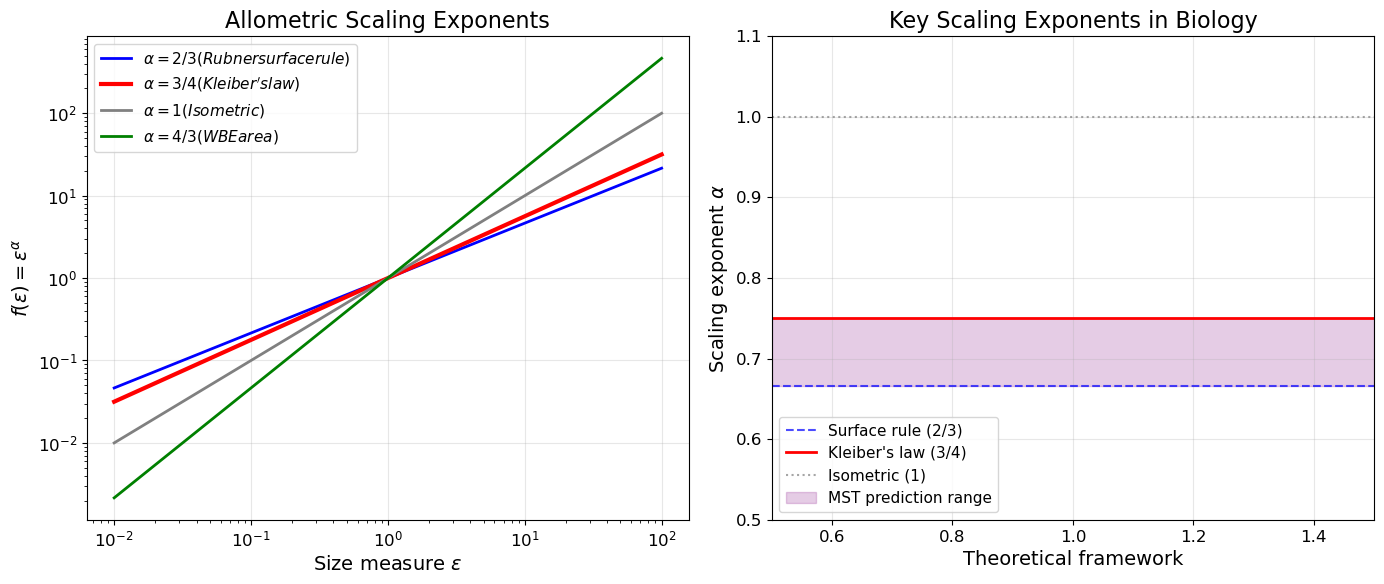

Geometric Interpretations:
  α = 2/3: Surface-to-volume ratio (Euclidean geometry)
  α = 3/4: Fractal branching networks (MST prediction)
  α = 1:   Linear proportionality (no scaling advantage)


In [2]:
def explore_scaling_exponents():
    """
    Visualize different scaling exponents and their geometric interpretations.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Left: Log-log plot of different scaling laws
    ax1 = axes[0]
    epsilon = np.logspace(-2, 2, 100)
    
    exponents = {
        '2/3 (Rubner surface rule)': 2/3,
        '3/4 (Kleiber\'s law)': 3/4,
        '1 (Isometric)': 1,
        '4/3 (WBE area)': 4/3,
    }
    
    colors = ['blue', 'red', 'gray', 'green']
    
    for (label, alpha), color in zip(exponents.items(), colors):
        y = epsilon ** alpha
        lw = 3 if alpha == 3/4 else 2
        ax1.loglog(epsilon, y, label=f'$\\alpha = {label}$', 
                   color=color, linewidth=lw)
    
    ax1.set_xlabel('Size measure $\\varepsilon$', fontsize=14)
    ax1.set_ylabel('$f(\\varepsilon) = \\varepsilon^\\alpha$', fontsize=14)
    ax1.set_title('Allometric Scaling Exponents', fontsize=16)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Right: Slope interpretation
    ax2 = axes[1]
    
    alphas = np.linspace(0.5, 1.5, 100)
    
    ax2.axhline(y=2/3, color='blue', linestyle='--', alpha=0.7, label='Surface rule (2/3)')
    ax2.axhline(y=3/4, color='red', linestyle='-', linewidth=2, label="Kleiber's law (3/4)")
    ax2.axhline(y=1, color='gray', linestyle=':', alpha=0.7, label='Isometric (1)')
    
    ax2.fill_between([0.5, 1.5], 2/3, 3/4, alpha=0.2, color='purple',
                      label='MST prediction range')
    
    ax2.set_xlim(0.5, 1.5)
    ax2.set_ylim(0.5, 1.1)
    ax2.set_xlabel('Theoretical framework', fontsize=14)
    ax2.set_ylabel('Scaling exponent $\\alpha$', fontsize=14)
    ax2.set_title('Key Scaling Exponents in Biology', fontsize=16)
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Geometric Interpretations:")
    print("  α = 2/3: Surface-to-volume ratio (Euclidean geometry)")
    print("  α = 3/4: Fractal branching networks (MST prediction)")
    print("  α = 1:   Linear proportionality (no scaling advantage)")

explore_scaling_exponents()

## 2. The WBE Model of Branching Networks

### Core Assumptions

The WBE model (West et al. 1997, 1999) makes three key assumptions:

1. **Space-filling network**: The distribution network must reach all parts of the organism
2. **Minimized energy dissipation**: The network minimizes the energy required for transport
3. **Invariant terminal units**: The smallest branches (capillaries) have fixed size

### Branching Notation

Consider a hierarchical branching network where:
- Level $k = 0$ is the trunk (aorta in animals, main stem in plants)
- Level $k = N$ is the terminal unit (capillaries, petioles)
- At each level, each parent branch produces $n$ daughter branches

Key variables at level $k$:
- $r_k$: branch radius
- $l_k$: branch length
- $n_k$: total number of branches at level $k$

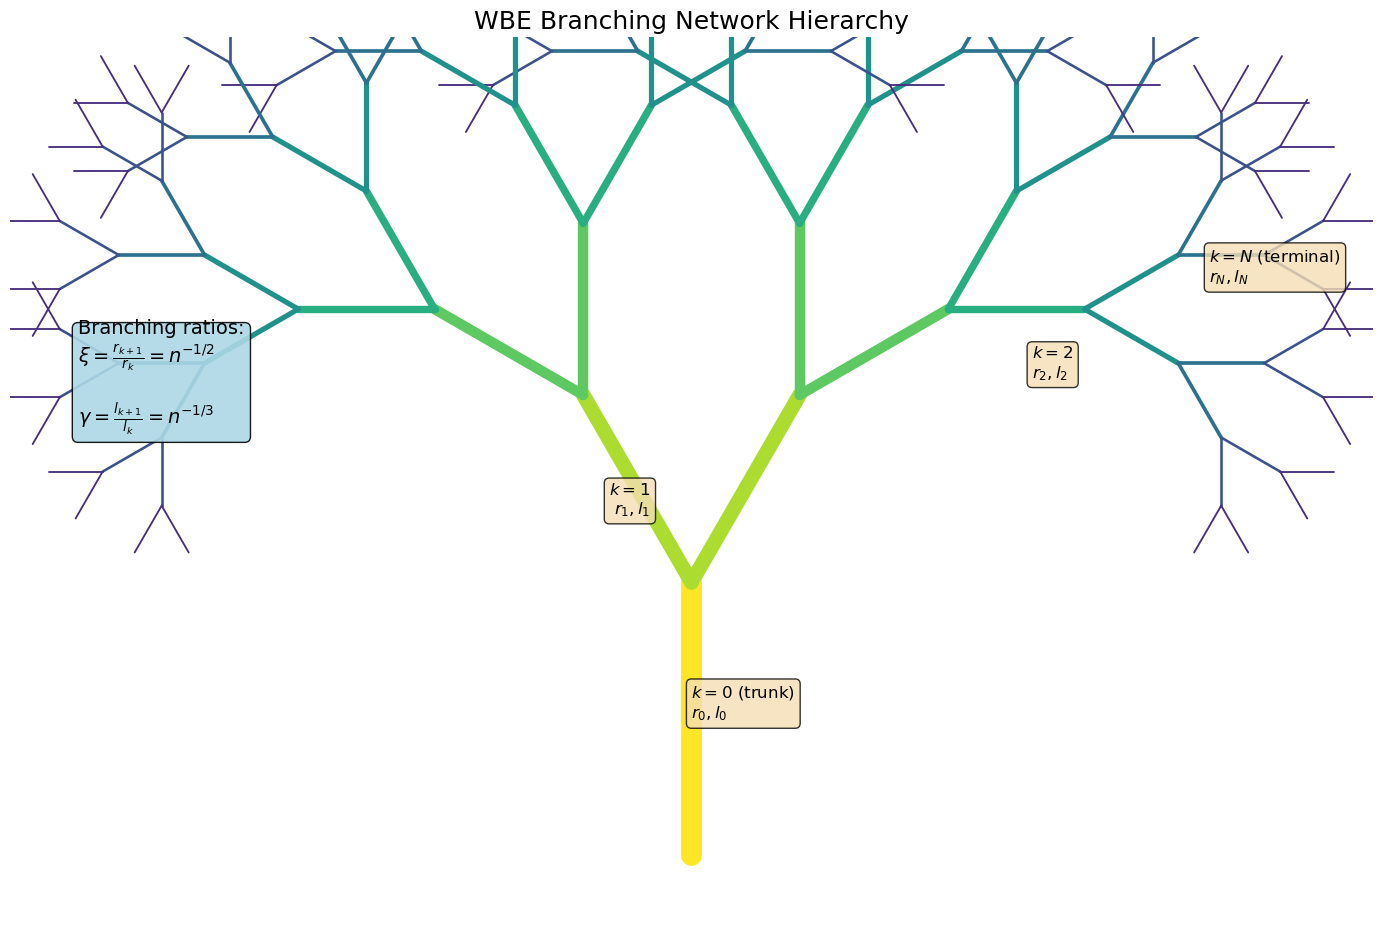

In [3]:
def draw_branching_diagram():
    """
    Illustrate the branching hierarchy notation used in WBE theory.
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    
    def draw_branch(x, y, length, width, angle, level, max_level):
        if level > max_level:
            return
        
        # Calculate end point
        dx = length * np.cos(angle)
        dy = length * np.sin(angle)
        
        # Draw branch as thick line
        color = plt.cm.viridis(1 - level / (max_level + 1))
        ax.plot([x, x + dx], [y, y + dy], linewidth=width, 
                color=color, solid_capstyle='round')
        
        # Branching ratios (WBE predictions for n=2)
        xi = 2 ** (-1/2)   # Radius ratio
        gamma = 2 ** (-1/3)  # Length ratio
        
        # Draw daughter branches
        new_length = length * gamma
        new_width = width * xi
        
        angle_spread = np.pi / 6
        for i, d_angle in enumerate([-angle_spread, angle_spread]):
            draw_branch(x + dx, y + dy, new_length, new_width, 
                       angle + d_angle, level + 1, max_level)
    
    # Draw the tree
    draw_branch(0, 0, 2.0, 15, np.pi/2, 0, 7)
    
    # Add level annotations
    annotations = [
        (0, 1.0, '$k = 0$ (trunk)\n$r_0, l_0$', 'left'),
        (-0.3, 2.5, '$k = 1$\n$r_1, l_1$', 'right'),
        (2.5, 3.5, '$k = 2$\n$r_2, l_2$', 'left'),
        (3.8, 4.2, '$k = N$ (terminal)\n$r_N, l_N$', 'left'),
    ]
    
    for x, y, text, ha in annotations:
        ax.annotate(text, xy=(x, y), fontsize=12, ha=ha,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Add equations
    eq_text = (
        "Branching ratios:\n"
        "$\\xi = \\frac{r_{k+1}}{r_k} = n^{-1/2}$\n\n"
        "$\\gamma = \\frac{l_{k+1}}{l_k} = n^{-1/3}$"
    )
    ax.text(-4.5, 3.5, eq_text, fontsize=14,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9),
            verticalalignment='center')
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-0.5, 6)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('WBE Branching Network Hierarchy', fontsize=18)
    
    plt.tight_layout()
    plt.show()

draw_branching_diagram()

## 3. Derivation of Branching Ratios

### Conservation of Flow

For an incompressible fluid, conservation of mass requires:

$$n_k \pi r_k^2 v_k = n_{k+1} \pi r_{k+1}^2 v_{k+1}$$

where $v_k$ is the flow velocity at level $k$.

### Energy Minimization

The power dissipated by viscous flow in a pipe (Poiseuille flow) is:

$$W = \frac{8\mu l Q^2}{\pi r^4}$$

where $\mu$ is viscosity, $l$ is length, $Q$ is flow rate, and $r$ is radius.

### Space-Filling Requirement

For the network to service all tissue, it must fill space. This requires:

$$n_k l_k^3 \approx \text{constant}$$

meaning the volume served by each level is invariant.

### Derivation of $\xi = n^{-1/2}$

From flow conservation and assuming velocity is preserved:

$$n \cdot r_{k+1}^2 = r_k^2$$

$$\frac{r_{k+1}^2}{r_k^2} = \frac{1}{n}$$

$$\xi = \frac{r_{k+1}}{r_k} = n^{-1/2}$$

### Derivation of $\gamma = n^{-1/3}$

From the space-filling requirement:

$$n_k l_k^3 = n_{k+1} l_{k+1}^3$$

Since $n_{k+1} = n \cdot n_k$:

$$l_k^3 = n \cdot l_{k+1}^3$$

$$\gamma = \frac{l_{k+1}}{l_k} = n^{-1/3}$$

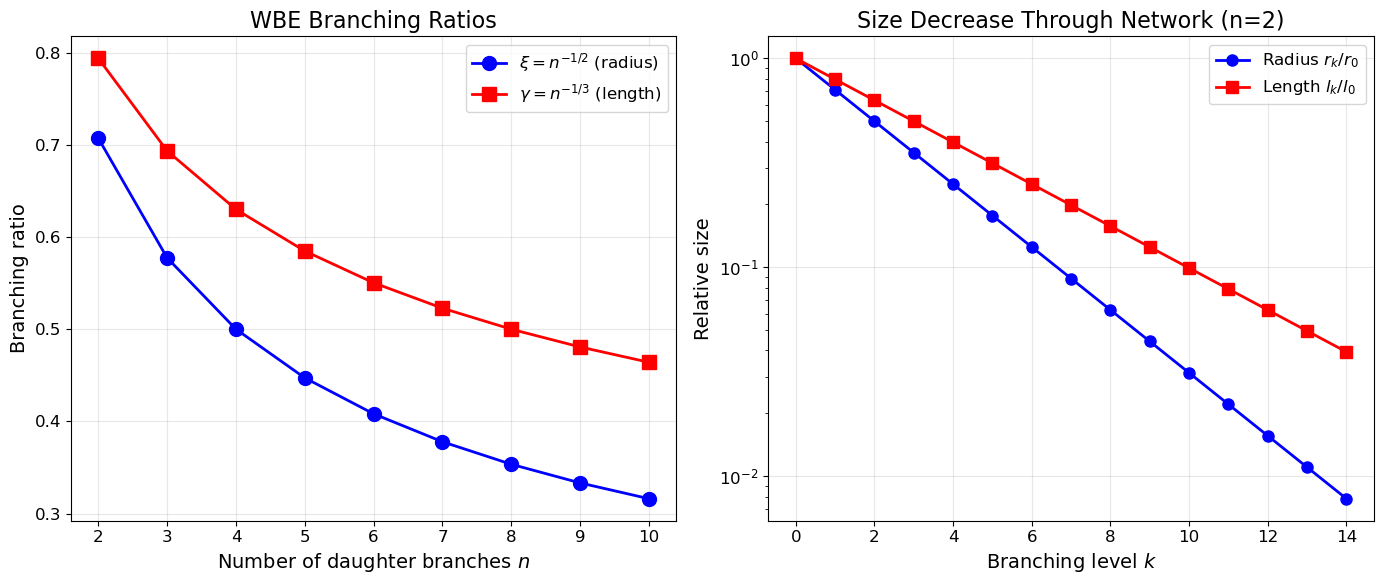


For binary branching (n = 2):
  ξ = 2^(-1/2) = 0.707107
  γ = 2^(-1/3) = 0.793701

After 10 branching levels:
  Radius decreases to 0.031250 of original
  Length decreases to 0.099213 of original


In [4]:
def compute_branching_ratios():
    """
    Compute and visualize WBE branching ratios for different n values.
    """
    # Range of branching numbers
    n_values = np.arange(2, 11)
    
    # Compute ratios
    xi = n_values ** (-1/2)   # Radius ratio
    gamma = n_values ** (-1/3)  # Length ratio
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Ratios vs n
    ax1 = axes[0]
    ax1.plot(n_values, xi, 'o-', color='blue', linewidth=2, 
             markersize=10, label='$\\xi = n^{-1/2}$ (radius)')
    ax1.plot(n_values, gamma, 's-', color='red', linewidth=2, 
             markersize=10, label='$\\gamma = n^{-1/3}$ (length)')
    
    ax1.set_xlabel('Number of daughter branches $n$', fontsize=14)
    ax1.set_ylabel('Branching ratio', fontsize=14)
    ax1.set_title('WBE Branching Ratios', fontsize=16)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(n_values)
    
    # Plot 2: Accumulated effect over levels
    ax2 = axes[1]
    
    levels = np.arange(0, 15)
    n = 2  # Binary branching
    
    r_accumulated = (n ** (-1/2)) ** levels
    l_accumulated = (n ** (-1/3)) ** levels
    
    ax2.semilogy(levels, r_accumulated, 'o-', color='blue', linewidth=2,
                 markersize=8, label='Radius $r_k/r_0$')
    ax2.semilogy(levels, l_accumulated, 's-', color='red', linewidth=2,
                 markersize=8, label='Length $l_k/l_0$')
    
    ax2.set_xlabel('Branching level $k$', fontsize=14)
    ax2.set_ylabel('Relative size', fontsize=14)
    ax2.set_title(f'Size Decrease Through Network (n={n})', fontsize=16)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Numerical values for binary branching
    n = 2
    print(f"\nFor binary branching (n = {n}):")
    print(f"  ξ = {n}^(-1/2) = {n**(-1/2):.6f}")
    print(f"  γ = {n}^(-1/3) = {n**(-1/3):.6f}")
    print(f"\nAfter 10 branching levels:")
    print(f"  Radius decreases to {(n**(-1/2))**10:.6f} of original")
    print(f"  Length decreases to {(n**(-1/3))**10:.6f} of original")

compute_branching_ratios()

## 4. Volume and Mass Predictions

### Branch Volume

The volume of a cylindrical branch at level $k$:

$$v_k = \pi r_k^2 l_k$$

### Total Network Volume

The total volume of the branching network is:

$$V_B = \pi \sum_{k=0}^{N} n_k r_k^2 l_k$$

### WBE Volume Formula

Using the branching ratios, WBE showed:

$$V_B \approx \gamma \xi^2 V_N \frac{1 - n^{-4/3N}}{1 - n^{-4/3}}$$

where $V_N$ is the volume at the terminal level.

### Service Volume

The volume **served** by a branch at level $k$ scales as:

$$v_{\text{served}} \propto l_k^3$$

The total served volume is preserved:

$$V_{\text{net}} = n_k v_{\text{served},k} \propto n_k l_k^3 = \text{constant}$$

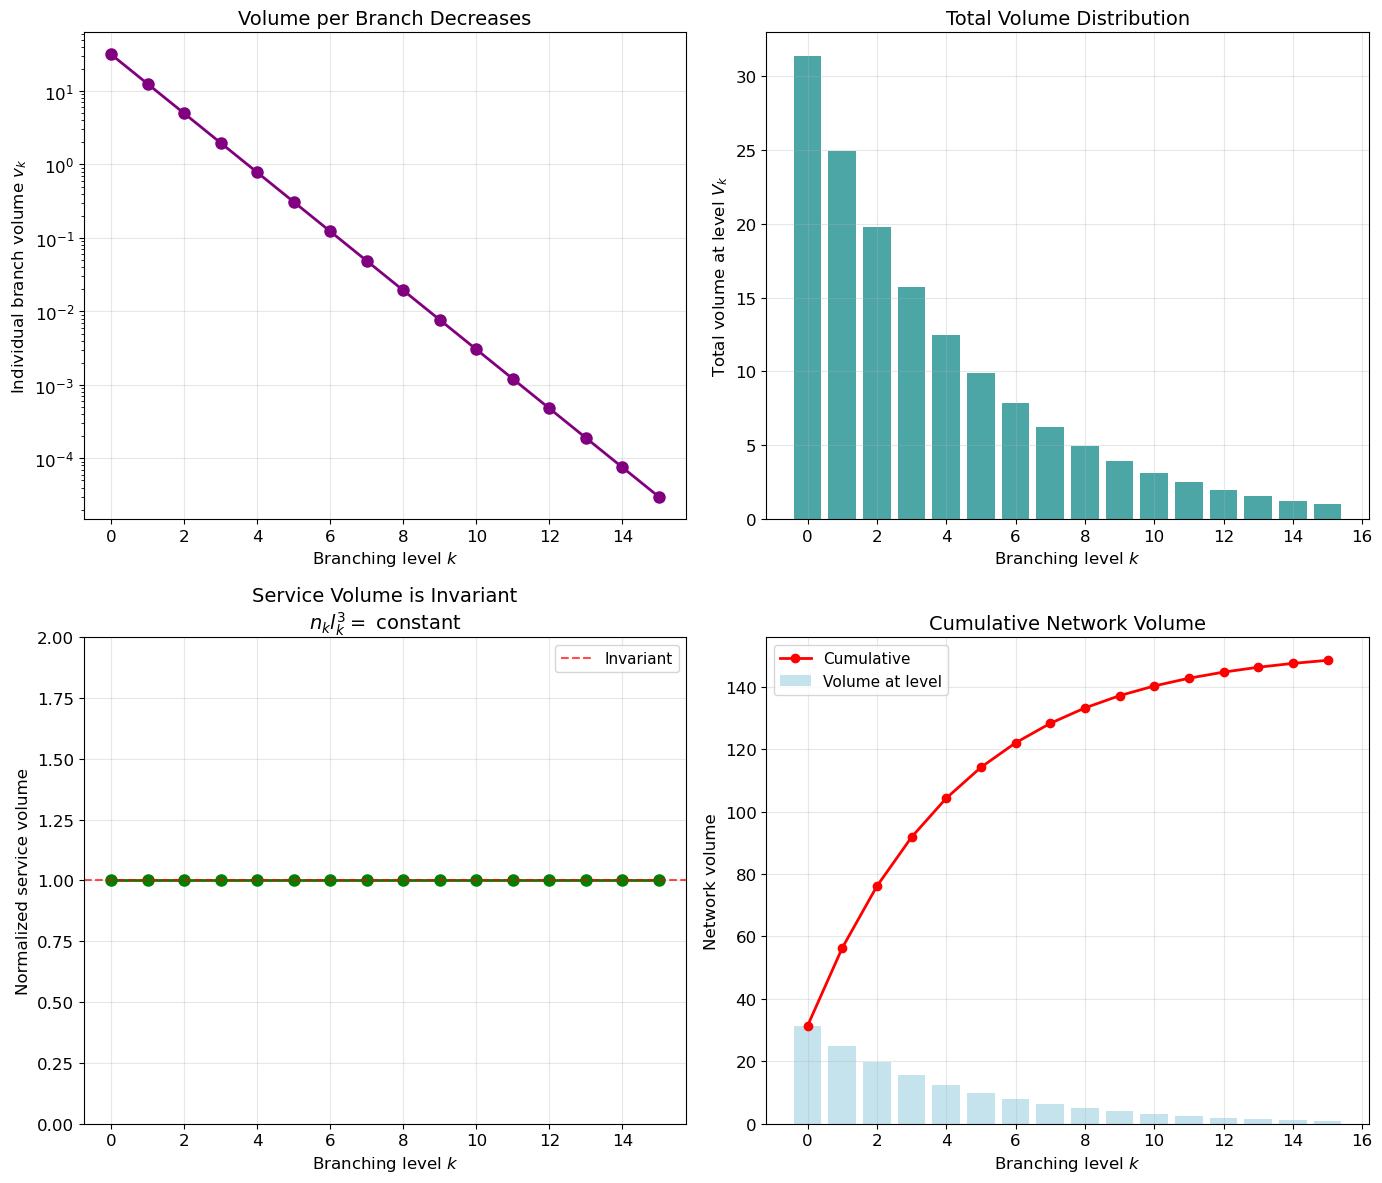

Total network volume: 148.51
Volume in trunk (k=0): 31.42 (21.2%)
Volume in terminals (k=15): 0.98 (0.7%)


In [5]:
def compute_network_volume():
    """
    Compute and visualize volume distributions in a branching network.
    """
    # Parameters
    n = 2  # Binary branching
    N = 15  # Number of levels
    
    # Initial dimensions (normalized)
    r_0 = 1.0
    l_0 = 10.0
    
    # Branching ratios
    xi = n ** (-1/2)
    gamma = n ** (-1/3)
    
    # Arrays for each level
    levels = np.arange(N + 1)
    n_k = n ** levels  # Number of branches at each level
    r_k = r_0 * (xi ** levels)  # Radius at each level
    l_k = l_0 * (gamma ** levels)  # Length at each level
    
    # Volume of individual branches
    v_k = np.pi * r_k**2 * l_k
    
    # Total volume at each level
    V_k = n_k * v_k
    
    # Service volume (l^3) at each level
    service_vol = l_k ** 3
    total_service = n_k * service_vol
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # Plot 1: Individual branch volume
    ax1 = axes[0, 0]
    ax1.semilogy(levels, v_k, 'o-', color='purple', linewidth=2, markersize=8)
    ax1.set_xlabel('Branching level $k$', fontsize=12)
    ax1.set_ylabel('Individual branch volume $v_k$', fontsize=12)
    ax1.set_title('Volume per Branch Decreases', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Total volume at each level
    ax2 = axes[0, 1]
    ax2.bar(levels, V_k, color='teal', alpha=0.7)
    ax2.set_xlabel('Branching level $k$', fontsize=12)
    ax2.set_ylabel('Total volume at level $V_k$', fontsize=12)
    ax2.set_title('Total Volume Distribution', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Service volume invariance
    ax3 = axes[1, 0]
    ax3.plot(levels, total_service / total_service[0], 'o-', 
             color='green', linewidth=2, markersize=8)
    ax3.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Invariant')
    ax3.set_xlabel('Branching level $k$', fontsize=12)
    ax3.set_ylabel('Normalized service volume', fontsize=12)
    ax3.set_title('Service Volume is Invariant\n$n_k l_k^3 = $ constant', fontsize=14)
    ax3.legend(fontsize=11)
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, 2)
    
    # Plot 4: Cumulative network volume
    ax4 = axes[1, 1]
    cumulative_V = np.cumsum(V_k)
    ax4.bar(levels, V_k, color='lightblue', alpha=0.7, label='Volume at level')
    ax4.plot(levels, cumulative_V, 'ro-', linewidth=2, 
             markersize=6, label='Cumulative')
    ax4.set_xlabel('Branching level $k$', fontsize=12)
    ax4.set_ylabel('Network volume', fontsize=12)
    ax4.set_title('Cumulative Network Volume', fontsize=14)
    ax4.legend(fontsize=11)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Total network volume: {cumulative_V[-1]:.2f}")
    print(f"Volume in trunk (k=0): {V_k[0]:.2f} ({100*V_k[0]/cumulative_V[-1]:.1f}%)")
    print(f"Volume in terminals (k={N}): {V_k[-1]:.2f} ({100*V_k[-1]/cumulative_V[-1]:.1f}%)")

compute_network_volume()

## 5. Fractal Dimension Predictions

### The Fundamental Relationship

The basic fractal scaling relationship is:

$$N \propto \frac{1}{\varepsilon^\beta} \equiv \varepsilon^{-\beta}$$

where $N$ is the number of elements of size $\varepsilon$ needed to measure the object, and $\beta$ is the scaling exponent (related to fractal dimension).

### Mass Dimension

For mass $m$ scaling with size $\varepsilon$:

$$m(\varepsilon) \propto \varepsilon^\beta$$

When a portion is removed, the remaining mass scales as:

$$m(\delta \varepsilon) = \delta^\beta m(\varepsilon)$$

### Predicted Mass Dimension from MST

From the volume scaling and branching ratios, WBE derived:

$$D_m = \frac{3}{2}$$

This is the **mass fractal dimension** for an optimal branching network in 3D space.

### Derivation Sketch

For a branching network viewed perpendicular to its main axis:

1. Area $A \propto V_{net}^{2/3}$
2. Using the volume scaling: $A \propto n^{2/3} l_N^2$
3. Number of boxes: $N(\varepsilon) \propto \frac{A}{\varepsilon^2}$
4. As $\varepsilon \to 0$: $N(\varepsilon) \propto \varepsilon^{-3/2}$

Therefore $D_m = \frac{3}{2}$.

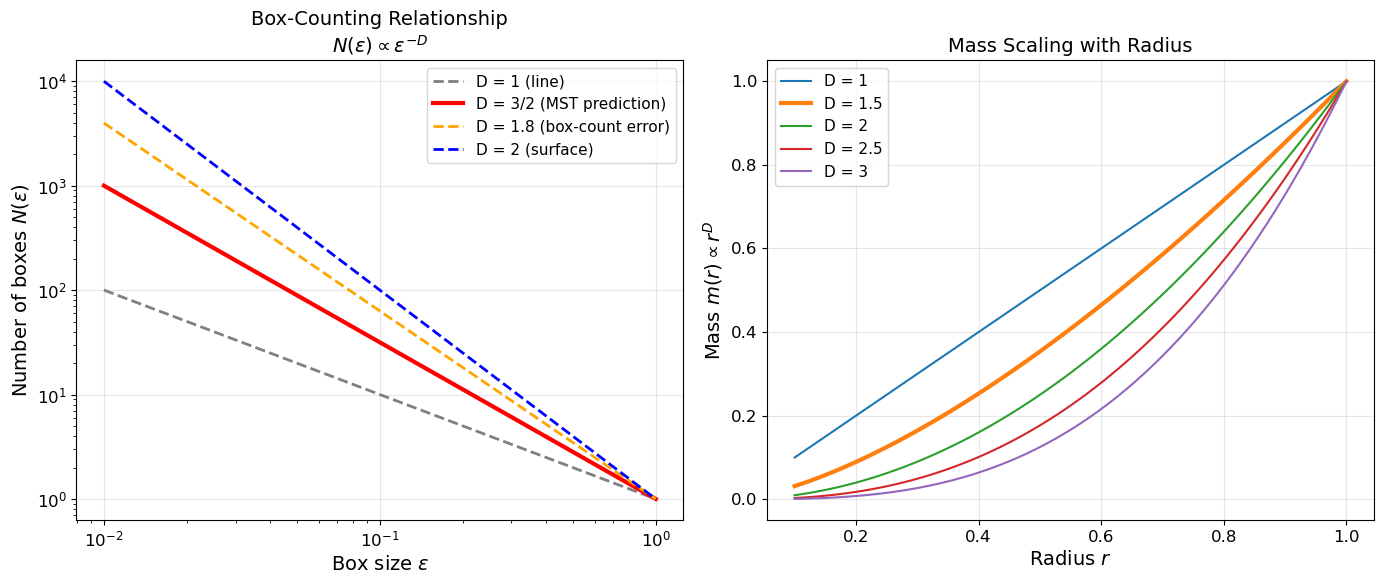

MST Prediction:
  The mass fractal dimension of optimal branching networks is D_m = 3/2

  This is LOWER than typical box-counting results (D ~ 1.8-1.9)
  because box-counting incorrectly assumes self-similarity.

  Differential box-counting correctly measures the mass dimension.


In [6]:
def visualize_dimension_prediction():
    """
    Visualize the fractal dimension prediction from MST.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Left: Log-log scaling relationship
    ax1 = axes[0]
    
    epsilon = np.logspace(-2, 0, 100)
    
    # Different dimensions
    D_values = {
        'D = 1 (line)': 1,
        'D = 3/2 (MST prediction)': 1.5,
        'D = 1.8 (box-count error)': 1.8,
        'D = 2 (surface)': 2,
    }
    
    colors = ['gray', 'red', 'orange', 'blue']
    
    for (label, D), color in zip(D_values.items(), colors):
        N = epsilon ** (-D)
        lw = 3 if D == 1.5 else 2
        ls = '-' if D == 1.5 else '--'
        ax1.loglog(epsilon, N, label=label, color=color, 
                   linewidth=lw, linestyle=ls)
    
    ax1.set_xlabel('Box size $\\varepsilon$', fontsize=14)
    ax1.set_ylabel('Number of boxes $N(\\varepsilon)$', fontsize=14)
    ax1.set_title('Box-Counting Relationship\n$N(\\varepsilon) \\propto \\varepsilon^{-D}$', fontsize=14)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Right: Mass dimension interpretation
    ax2 = axes[1]
    
    r = np.linspace(0.1, 1, 100)
    
    # Mass scaling for different dimensions
    D_values = [1, 1.5, 2, 2.5, 3]
    
    for D in D_values:
        mass = r ** D
        lw = 3 if D == 1.5 else 1.5
        ax2.plot(r, mass, label=f'D = {D}', linewidth=lw)
    
    ax2.set_xlabel('Radius $r$', fontsize=14)
    ax2.set_ylabel('Mass $m(r) \\propto r^D$', fontsize=14)
    ax2.set_title('Mass Scaling with Radius', fontsize=14)
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("MST Prediction:")
    print("  The mass fractal dimension of optimal branching networks is D_m = 3/2")
    print("\n  This is LOWER than typical box-counting results (D ~ 1.8-1.9)")
    print("  because box-counting incorrectly assumes self-similarity.")
    print("\n  Differential box-counting correctly measures the mass dimension.")

visualize_dimension_prediction()

## 6. Connection to Metabolic Scaling

### From Geometry to Metabolism

The 3/4 scaling exponent for metabolism emerges from the fractal geometry:

1. Metabolic rate $B$ is proportional to the number of terminal units: $B \propto n_N$

2. Body mass $M$ is proportional to the service volume: $M \propto l_0^3$

3. From the branching ratios: $n_N \propto l_0^3 / l_N^3 \propto M/l_N^3$

4. With terminal units of fixed size ($l_N$ = constant): $B \propto M$

5. But accounting for the fractal filling: $B \propto M^{3/4}$

### The 3/4 Power Law

The fractal dimension $D = 3/2$ in 3D space corresponds to:

$$\alpha = \frac{D}{D+1} = \frac{3/2}{3/2 + 1} = \frac{3/2}{5/2} = \frac{3}{5} \cdot \frac{2}{2} = \frac{3}{4}$$

Wait, let me correct this derivation. The actual relationship is:

The 3/4 exponent comes from the fact that metabolic rate scales as:

$$B \propto M^{d/(d+1)}$$

where $d = 3$ is the embedding dimension. So:

$$B \propto M^{3/4}$$

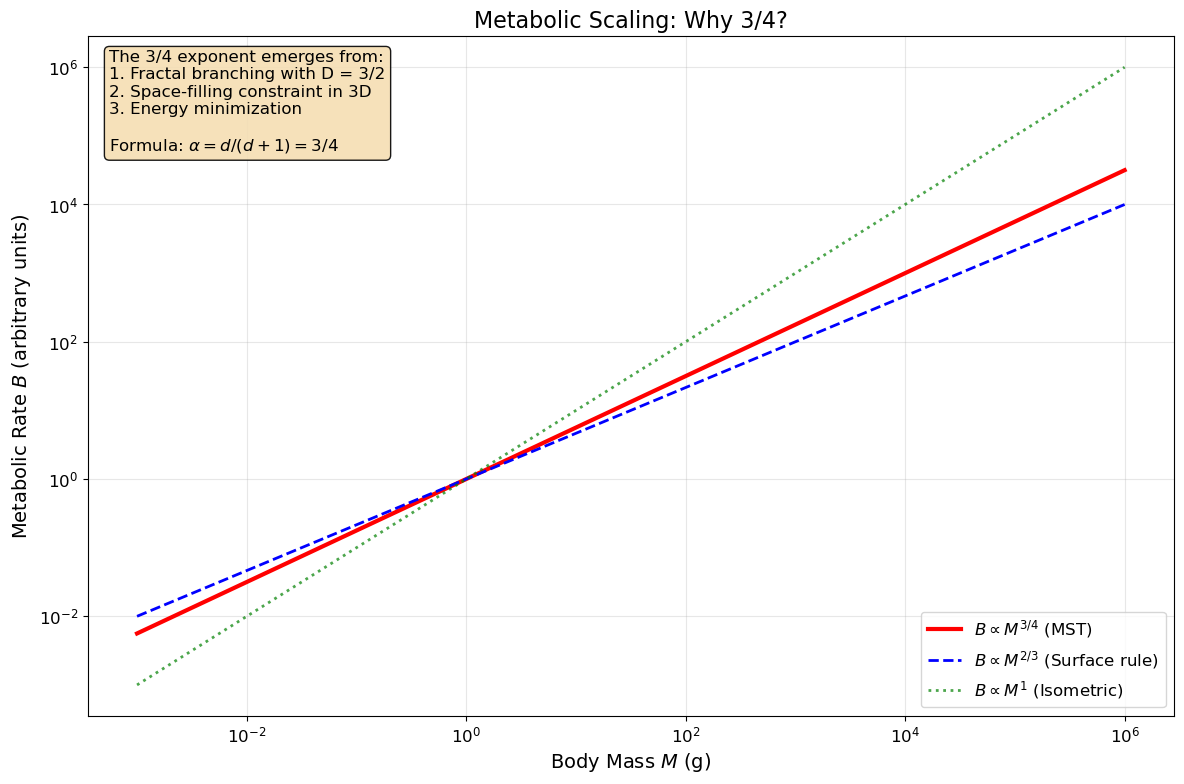

Key insight:
  The 3/4 exponent is NOT coincidental!
  It emerges from the fundamental geometry of resource distribution.

  For embedding dimension d = 3:
    α = d/(d+1) = 3/(3+1) = 3/4 = 0.7500

  For 2D organisms (leaves, lichens):
    α = 2/(2+1) = 2/3 = 0.6667


In [7]:
def derive_metabolic_exponent():
    """
    Show how the 3/4 metabolic exponent emerges from branching geometry.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Range of body masses
    M = np.logspace(-3, 6, 100)  # From grams to tons
    
    # Metabolic rate predictions
    B_34 = M ** (3/4)  # WBE prediction
    B_23 = M ** (2/3)  # Surface rule
    B_1 = M ** 1       # Isometric
    
    ax.loglog(M, B_34, 'r-', linewidth=3, label='$B \\propto M^{3/4}$ (MST)')
    ax.loglog(M, B_23, 'b--', linewidth=2, label='$B \\propto M^{2/3}$ (Surface rule)')
    ax.loglog(M, B_1, 'g:', linewidth=2, alpha=0.7, label='$B \\propto M^1$ (Isometric)')
    
    ax.set_xlabel('Body Mass $M$ (g)', fontsize=14)
    ax.set_ylabel('Metabolic Rate $B$ (arbitrary units)', fontsize=14)
    ax.set_title('Metabolic Scaling: Why 3/4?', fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Add explanatory text
    text = (
        "The 3/4 exponent emerges from:\n"
        "1. Fractal branching with D = 3/2\n"
        "2. Space-filling constraint in 3D\n"
        "3. Energy minimization\n"
        "\nFormula: $\\alpha = d/(d+1) = 3/4$"
    )
    ax.text(0.02, 0.98, text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9))
    
    plt.tight_layout()
    plt.show()
    
    print("Key insight:")
    print("  The 3/4 exponent is NOT coincidental!")
    print("  It emerges from the fundamental geometry of resource distribution.")
    print(f"\n  For embedding dimension d = 3:")
    print(f"    α = d/(d+1) = 3/(3+1) = 3/4 = {3/4:.4f}")
    print(f"\n  For 2D organisms (leaves, lichens):")
    print(f"    α = 2/(2+1) = 2/3 = {2/3:.4f}")

derive_metabolic_exponent()

## 7. Connection to L-Systems and Peano Curves

### Lindenmayer Systems

The branching ratios from MST ($\gamma = n^{-1/3}$ and $\xi = n^{-1/2}$) can be implemented as a **Lindenmayer system (L-system)** - a formal grammar for generating fractal structures.

### Peano Curves

The MST branching network is equivalent to a space-filling **Peano curve** (Peano 1890). Both:
- Fill the available volume
- Have a hierarchical structure
- Approach every point in space

### Formal Grammar

An L-system for a WBE tree might use:
- **Axiom**: `F` (initial trunk)
- **Rule**: `F → F[+F][-F]` (branching)
- **Parameters**: 
  - Length reduction: $\gamma = n^{-1/3}$
  - Width reduction: $\xi = n^{-1/2}$
  - Angle: determined by space-filling optimization

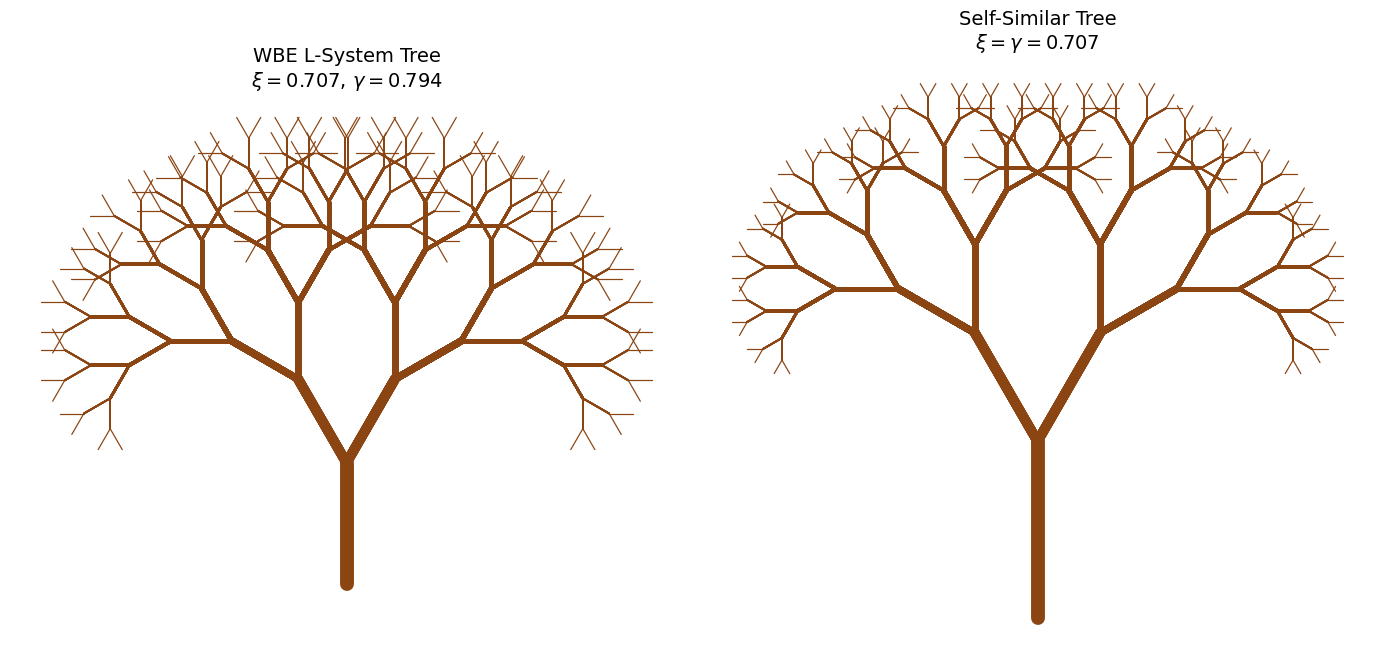

L-System Grammar:
  Axiom: F
  Rule: F → F[+F][-F]

WBE Parameters (n=2):
  Width ratio: ξ = 2^(-1/2) = 0.7071
  Length ratio: γ = 2^(-1/3) = 0.7937


In [8]:
def generate_lsystem_tree(axiom, rules, iterations):
    """
    Generate an L-system string.
    """
    current = axiom
    for _ in range(iterations):
        next_string = ""
        for char in current:
            next_string += rules.get(char, char)
        current = next_string
    return current

def draw_lsystem_wbe(ax, string, length, angle_deg, xi, gamma):
    """
    Draw an L-system tree with WBE branching ratios.
    """
    import turtle
    
    x, y = 0, 0
    heading = 90  # Start pointing up
    stack = []
    current_length = length
    current_width = 10
    
    angle = np.radians(angle_deg)
    
    for char in string:
        if char == 'F':
            # Draw forward
            dx = current_length * np.cos(np.radians(heading))
            dy = current_length * np.sin(np.radians(heading))
            ax.plot([x, x + dx], [y, y + dy], 
                   linewidth=current_width, color='saddlebrown',
                   solid_capstyle='round')
            x += dx
            y += dy
        elif char == '+':
            heading += angle_deg
        elif char == '-':
            heading -= angle_deg
        elif char == '[':
            # Push state
            stack.append((x, y, heading, current_length, current_width))
            current_length *= gamma
            current_width *= xi
        elif char == ']':
            # Pop state
            x, y, heading, current_length, current_width = stack.pop()

def plot_lsystem_tree():
    """
    Generate and display an L-system tree with WBE parameters.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 8))
    
    # L-system parameters
    axiom = "F"
    rules = {"F": "F[+F][-F]"}
    
    n = 2
    xi = n ** (-1/2)   # WBE radius ratio
    gamma = n ** (-1/3)  # WBE length ratio
    
    # Left: WBE parameters
    ax1 = axes[0]
    string = generate_lsystem_tree(axiom, rules, 7)
    draw_lsystem_wbe(ax1, string, 1.0, 30, xi, gamma)
    ax1.set_aspect('equal')
    ax1.axis('off')
    ax1.set_title(f'WBE L-System Tree\n$\\xi = {xi:.3f}$, $\\gamma = {gamma:.3f}$', fontsize=14)
    
    # Right: Symmetric (self-similar) for comparison
    ax2 = axes[1]
    xi_sym = 0.707  # Same ratio for both
    gamma_sym = 0.707
    draw_lsystem_wbe(ax2, string, 1.0, 30, xi_sym, gamma_sym)
    ax2.set_aspect('equal')
    ax2.axis('off')
    ax2.set_title(f'Self-Similar Tree\n$\\xi = \\gamma = {xi_sym:.3f}$', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    print("L-System Grammar:")
    print(f"  Axiom: {axiom}")
    print(f"  Rule: F → F[+F][-F]")
    print(f"\nWBE Parameters (n=2):")
    print(f"  Width ratio: ξ = 2^(-1/2) = {2**(-1/2):.4f}")
    print(f"  Length ratio: γ = 2^(-1/3) = {2**(-1/3):.4f}")

plot_lsystem_tree()

## Summary

### Key Equations

| Quantity | Formula | Description |
|----------|---------|-------------|
| Radius ratio | $\xi = n^{-1/2}$ | How radius decreases per branching level |
| Length ratio | $\gamma = n^{-1/3}$ | How length decreases per branching level |
| Metabolic scaling | $B \propto M^{3/4}$ | Kleiber's law from fractal geometry |
| Mass dimension | $D_m = 3/2$ | Predicted fractal dimension |
| Service volume | $n_k l_k^3 = $ const | Space-filling invariant |

### Key Insights

1. **Branching is anisotropic**: $\xi \neq \gamma$, so biological networks are self-affine

2. **The 3/4 law is geometric**: It emerges from optimal space-filling in 3D

3. **Mass dimension = 3/2**: This can be measured with differential box-counting

4. **L-systems capture MST**: The formal grammar naturally encodes the scaling rules

### Next Steps

In the next notebooks:
- **Notebook 3**: Analyze actual and synthetic branching networks
- **Notebook 4**: Implement differential box-counting for mass dimension
- **Notebook 5**: Validate predictions against empirical data

---

## References

- West, G.B., Brown, J.H., & Enquist, B.J. (1997). A general model for the origin of allometric scaling laws in biology. Science, 276(5309), 122-126.
- West, G.B., Brown, J.H., & Enquist, B.J. (1999). A general model for the structure and allometry of plant vascular systems. Nature, 400(6745), 664-667.
- Brown, J.H., Gillooly, J.F., Allen, A.P., Savage, V.M., & West, G.B. (2004). Toward a metabolic theory of ecology. Ecology, 85(7), 1771-1789.
- Peano, G. (1890). Sur une courbe, qui remplit toute une aire plane. Mathematische Annalen, 36(1), 157-160.